In [1]:

# problem 1
def leibniz_sum(n):
    total = 0
    for k in range(n):
        total += ((-1)**k) / (2*k + 1)
    return total


In [2]:
# problem 2

## a
def leibniz_modulo(n):
    total = 0
    for k in range(n):
        if k % 2 == 0:
            total += 1 / (2*k + 1)
        else:
            total -= 1 / (2*k + 1)
    return total


## b

def leibniz_power(n):
    total = 0
    for k in range(n):
        total += ((-1)**k) / (2*k + 1)
    return total


## c
def leibniz_list(n):
    terms = [((-1)**k) / (2*k + 1) for k in range(n)]
    return sum(terms)

## d
def leibniz_set(n):
    terms = {((-1)**k) / (2*k + 1) for k in range(n)}
    return sum(terms)


## e
def leibniz_dict(n):
    terms = {k: ((-1)**k) / (2*k + 1) for k in range(n)}
    return sum(terms.values())

## f
import numpy as np

def leibniz_numpy(n):
    k = np.arange(n)
    terms = ((-1)**k) / (2*k + 1)
    return np.sum(terms)

## g
def leibniz_numpy_index(n):
    k = np.arange(n)
    terms = 1 / (2*k + 1)
    pos_sum = np.sum(terms[::2])   
    neg_sum = np.sum(terms[1::2])
    return pos_sum - neg_sum


## j
def leibniz_pairwise(n):
    total = 0
    for k in range(0, n, 2):
        if k+1 < n:
            total += 1/(2*k + 1) - 1/(2*(k+1) + 1)
        else:  # odd leftover
            total += 1/(2*k + 1)
    return total


In [3]:
# Problem 3

import math
import timeit


def test_all(n=1000000):
    methods = {
        "Modulo": leibniz_modulo,
        "Power": leibniz_power,
        "List": leibniz_list,
        "Set": leibniz_set,
        "Dict": leibniz_dict,
        "NumPy": leibniz_numpy,
        "NumPy Index": leibniz_numpy_index,
        "Pairwise": leibniz_pairwise
    }

    print(f"{'Method':<12}{'Approx π':<20}{'Error':<15}{'Time (s)':<10}")
    print("-"*60)

    for name, func in methods.items():
        approx_pi = 4 * func(n)  # x4 = pi
        error = abs(approx_pi - math.pi)
        runtime = timeit.timeit(lambda: func(n), number=3) / 3
        print(f"{name:<12}{approx_pi:<20.15f}{error:<15.3e}{runtime:<10.5f}")

# run
if __name__ == "__main__":
    test_all(1000000)

Method      Approx π            Error          Time (s)  
------------------------------------------------------------
Modulo      3.141591653589774   1.000e-06      0.04270   
Power       3.141591653589774   1.000e-06      0.15045   
List        3.141591653589774   1.000e-06      0.14787   
Set         3.141591653590112   1.000e-06      0.25009   
Dict        3.141591653589774   1.000e-06      0.16924   
NumPy       3.141591653589794   1.000e-06      0.01099   
NumPy Index 3.141591653589794   1.000e-06      0.00202   
Pairwise    3.141591653589908   1.000e-06      0.03616   


### NumPy Index is the fastest and with the minimum error. See the result table.

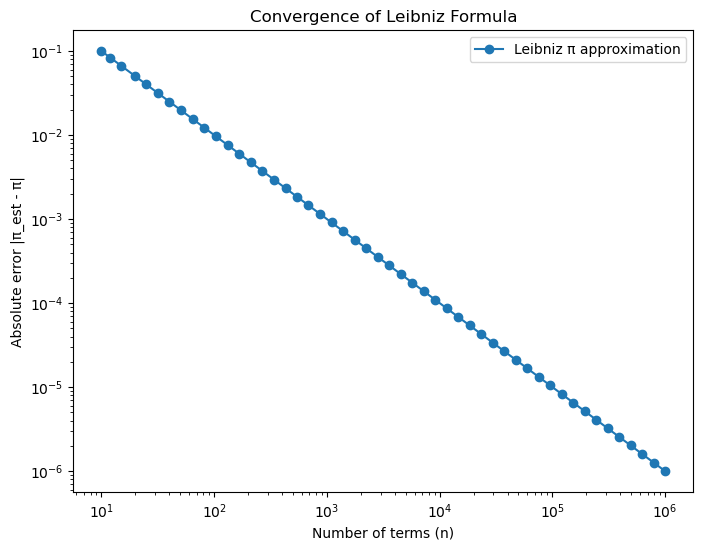

In [5]:
# Problem 4

import matplotlib.pyplot as plt


# range of n
N = np.logspace(1, 6, 50, dtype=int)   # 10 to 1,000,000
errors = []

for n in N:
    approx = 4 * leibniz_numpy(n)
    errors.append(abs(approx - math.pi))

plt.figure(figsize=(8, 6))
plt.loglog(N, errors, marker='o', label="Leibniz π approximation")
plt.xlabel("Number of terms (n)")
plt.ylabel("Absolute error |π_est - π|")
plt.title("Convergence of Leibniz Formula")
plt.legend()
# plt.grid(True, which="both", ls="--")
plt.show()



## Problem 5

### The logic is identical, but the syntax differs, eg; Use vectorized arrays with MATLAB operators (.^, ./).
